In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('..')

In [2]:
from pstudio.util import qbess, qbessp, qbesspp
from pstudio.util import rqbess, rqbessp, rqbesspp
import scipy
from scipy.special import spherical_jn as jn

In [6]:
def deriv1(f, x, dx=1e-4):
    return (f(x+dx) - f(x-dx))/(2*dx)

def deriv2(f, x, dx=1e-4):
    return (f(x+dx) - 2*f(x) + f(x-dx))/(dx*dx)

In [7]:
r = np.linspace(0.01, 10, 1000)

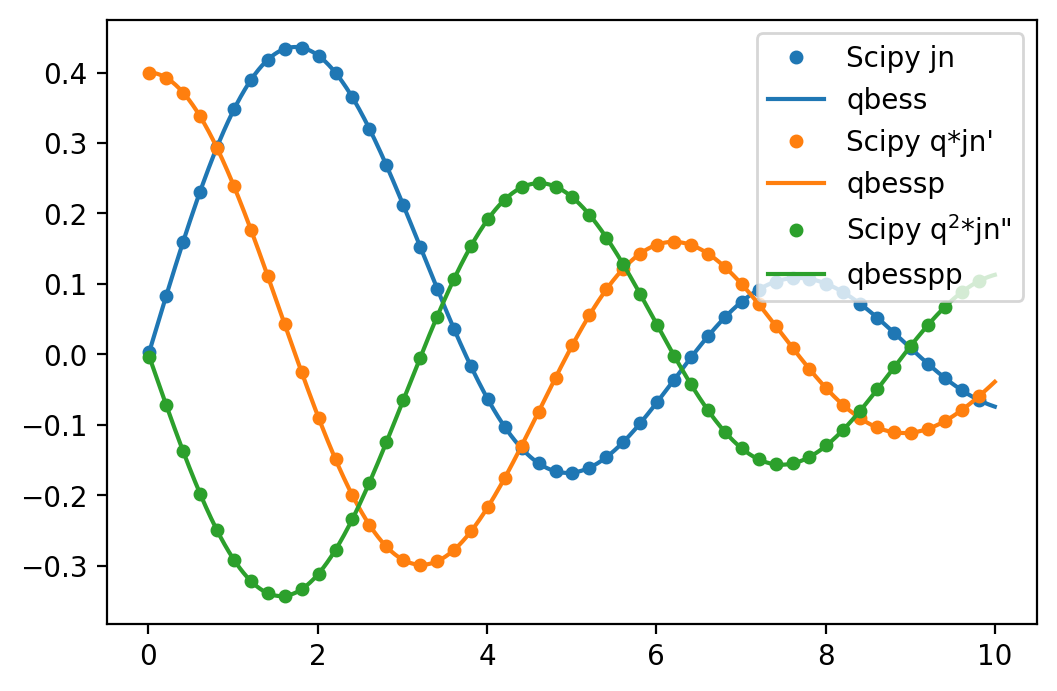

In [8]:
l = 1
q = 1.2

fig = plt.figure(dpi=200)
plt.plot(r[::20], jn(l,q*r[::20]), color='C0', marker='o', markersize=4, linestyle='none', label='Scipy jn')
plt.plot(r, qbess(l,q,r), color='C0', label='qbess')

plt.plot(r[::20], q*jn(l,q*r[::20],True), color='C1', marker='o', markersize=4, linestyle='none', label='Scipy q*jn\'')
plt.plot(r, qbessp(l,q,r), color='C1', label='qbessp')

plt.plot(r[::20], deriv2(lambda x: q*q*jn(l,x), q*r[::20]), color='C2', marker='o', markersize=4, linestyle='none', label='Scipy q$^2$*jn\"')
plt.plot(r, qbesspp(l,q,r), color='C2', label='qbesspp')


plt.legend()
plt.show()

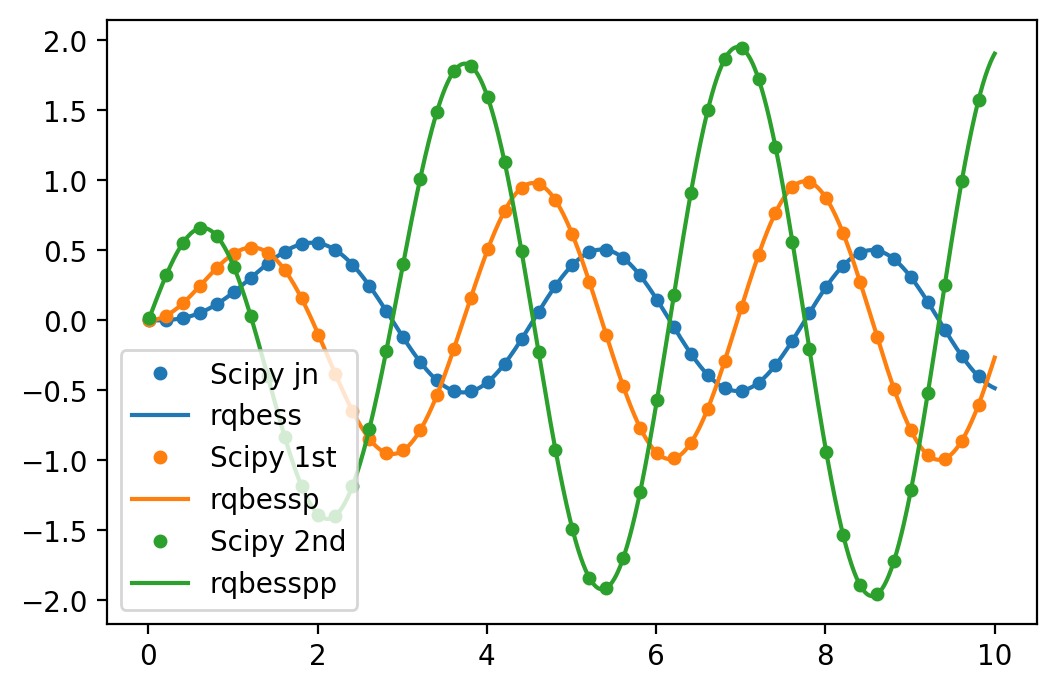

In [13]:
l = 2
q = 2.0

fig = plt.figure(dpi=200)
if l == 0:
    plt.plot(r[::20], np.sin(q*r[::20])/q, color='C0', marker='o', markersize=4, linestyle='none', label='Scipy jn')
else:
    plt.plot(r[::20], r[::20]*jn(l,q*r[::20]), color='C0', marker='o', markersize=4, linestyle='none', label='Scipy jn')
plt.plot(r, rqbess(l,q,r), color='C0', label='rqbess')

d1 = deriv1( lambda x: x*jn(l,x), q*r[::20])
if l == 0:
    plt.plot(r[::20], np.cos(q*r[::20]), color='C1', marker='o', markersize=4, linestyle='none', label='Scipy 1st')
else:
    plt.plot(r[::20], d1, color='C1', marker='o', markersize=4, linestyle='none', label='Scipy 1st')
plt.plot(r, rqbessp(l,q,r), color='C1', label='rqbessp')

d2 = q*deriv2( lambda x: x*jn(l,x), q*r[::20])
if l == 0:
    plt.plot(r[::20], -q*np.sin(q*r[::20]), color='C2', marker='o', markersize=4, linestyle='none', label='Scipy 2nd')
else:
    plt.plot(r[::20], d2, color='C2', marker='o', markersize=4, linestyle='none', label='Scipy 2nd')
plt.plot(r, rqbesspp(l,q,r), color='C2', label='rqbesspp')

plt.legend()
plt.show()